# Homework 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
%matplotlib inline

## Problem 1

The truncation error dominates from 0.1 to 0.00018
The round-off error dominates from 0.00018 to negative infintiy


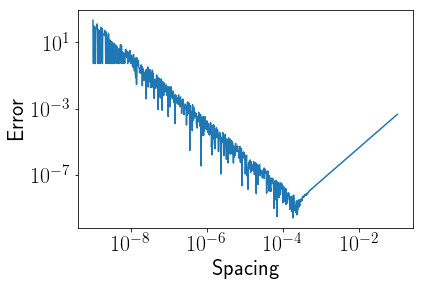

In [140]:
dx= 10**np.linspace(-1.,-9.,1000)
f2xn= (np.cos(1+dx)-2*np.cos(1)+np.cos(1-dx))/dx**2
f2x=-np.cos(1)
error=np.abs(f2xn-f2x)
plt.gcf().tight_layout()
plt.rc('text', usetex=True)
plt.rc('font', size=22)
plt.loglog(dx,error)
plt.xlabel(r'Spacing')
plt.ylabel(r'Error')
print('The truncation error dominates from',dx[0],'to',np.round(dx[np.argmin(error)],5))
print('The round-off error dominates from',np.round(dx[np.argmin(error)],5),'to negative infintiy')

## Problem 2

### I read the chapter 2 from the text book. 

The hyperbolic equations have waves in both directions. The information travels at a specific speed. The elliptical equation doesn't have time in them. So, information is felt almost instatneously. They are boundary value problem. Parabolic pdes combine both hyperbolic and elliptical characteristics. Thermal diffusion and viscous diffusion are few examples. The information smoothens like how termperature tends to smoothen by diffusion.

## Problem 3 a

In [141]:
def fastfourier(t,y):
    
    Ts = t[1]-t[0]; # sampling interval
    
    n = len(y) # length of the signal
    frq = np.fft.fftfreq(n,Ts) # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range

    Y = np.fft.fft(y)*2/n # factor 2 for conserving energy and normalization
    Y = Y[range(int(n/2))]

    print('First 5 frequencies',t[0:5])
    print('First 5 amplitudes for real',abs(Y.real)[0:5])
    print('First 5 amplitudes for imaginary',abs(Y.imag)[0:5])
    
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()
    plt.loglog(frq,abs(Y.real),'r') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel(r'$|real Y|$')
    plt.show()
    plt.loglog(frq,abs(Y.imag),'r') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel(r'$|imag Y|$')
    plt.show()
    return

First 5 frequencies [0.  0.1 0.2 0.3 0.4]
First 5 amplitudes for real [2.59928247e-17 1.42822153e-17 5.40941475e-16 6.13277832e-18
 2.66724250e-17]
First 5 amplitudes for imaginary [0.00000000e+00 3.19849755e-17 1.00000000e+00 8.49197651e-17
 6.18385246e-17]


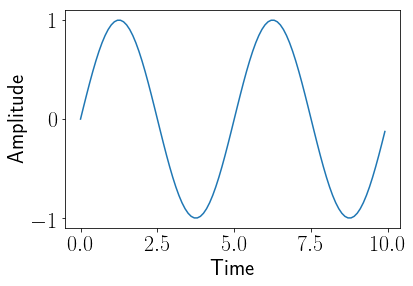

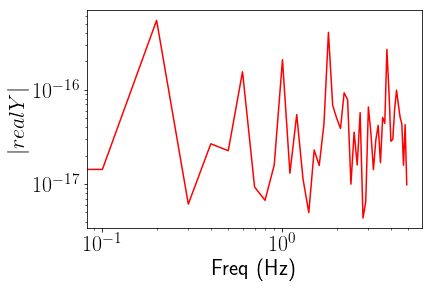

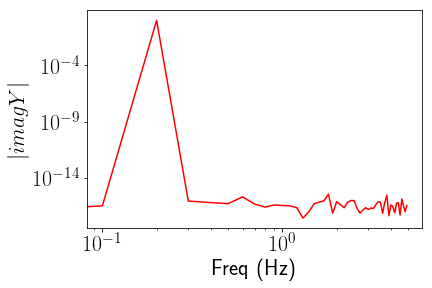

In [142]:
t=np.arange(0,10,0.1)
y = np.sin(2*np.pi*0.2*t)
fastfourier(t,y)

## Problem 3 b

First 5 frequencies [0.  0.1 0.2 0.3 0.4]
First 5 amplitudes for real [5.38458167e-17 7.02025426e-17 1.00000000e+00 2.91392104e-17
 1.32065891e-17]
First 5 amplitudes for imaginary [0.00000000e+00 2.76622751e-17 4.88498131e-16 8.46373541e-18
 9.46608382e-18]


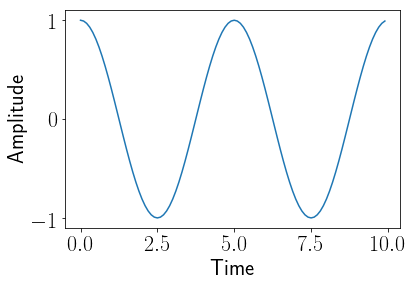

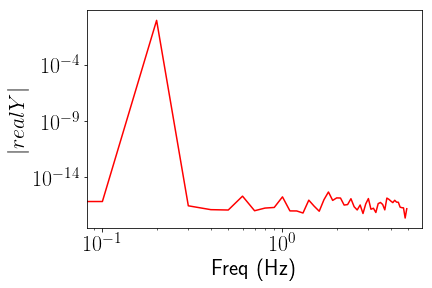

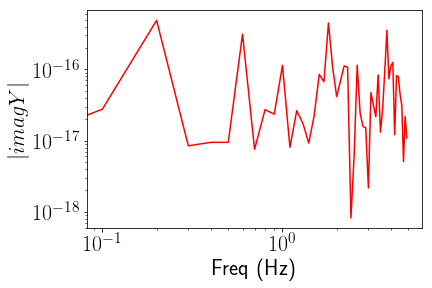

In [143]:
t=np.arange(0,10,0.1)
y = np.cos(2*np.pi*0.2*t)
fastfourier(t,y)

## Problem 3 c

First 5 frequencies [0.  0.1 0.2 0.3 0.4]
First 5 amplitudes for real [2.11219930e-16 2.33627758e-16 7.07106781e-01 4.12715278e-17
 6.27337350e-17]
First 5 amplitudes for imaginary [0.00000000e+00 1.44766424e-17 7.07106781e-01 2.23064083e-16
 9.61406913e-17]


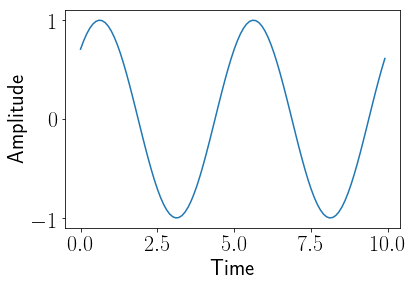

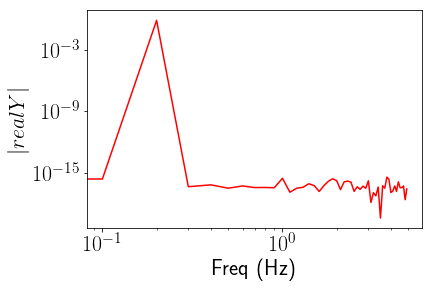

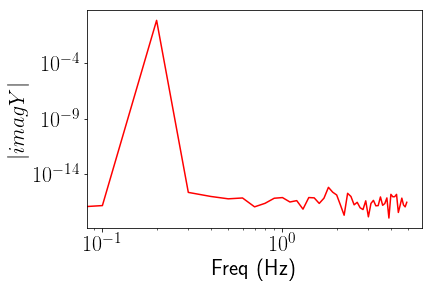

In [144]:
t=np.arange(0,10,0.1)
y = np.sin(2*np.pi*0.2*t+np.pi/4)
fastfourier(t,y)

## Problem 4

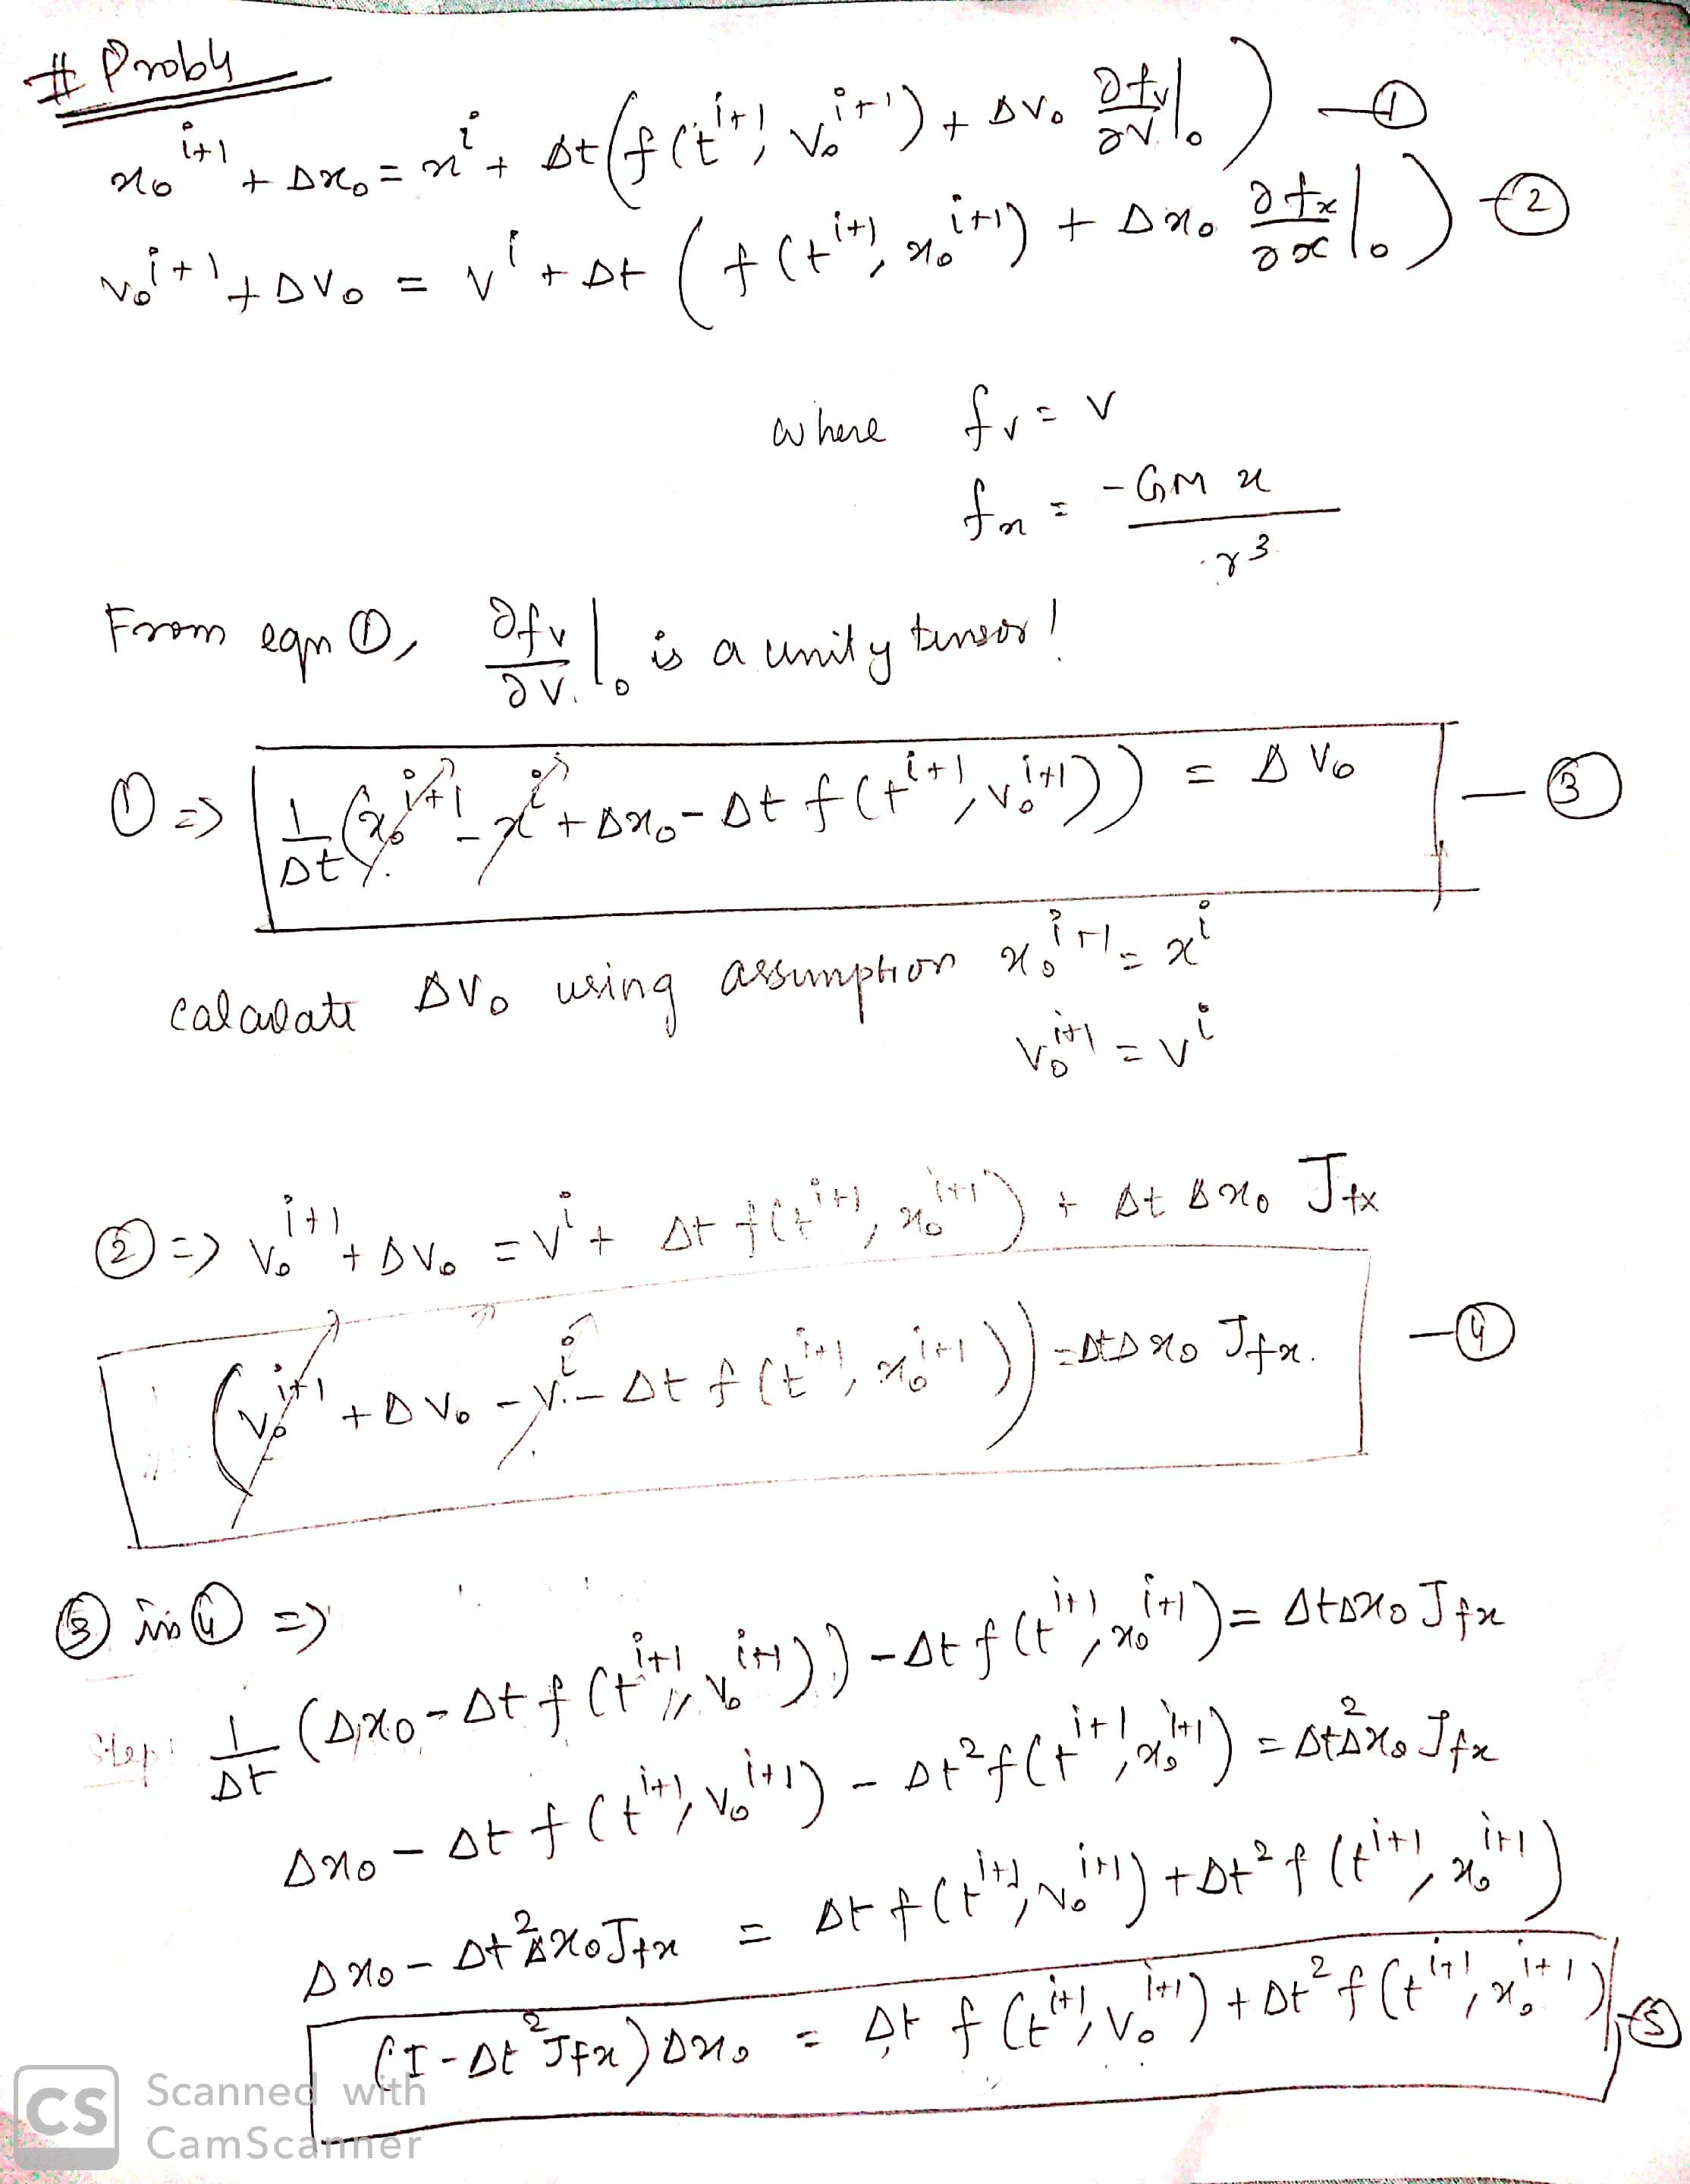

In [161]:
from IPython.display import Image
Image("./hw2_1.jpg")

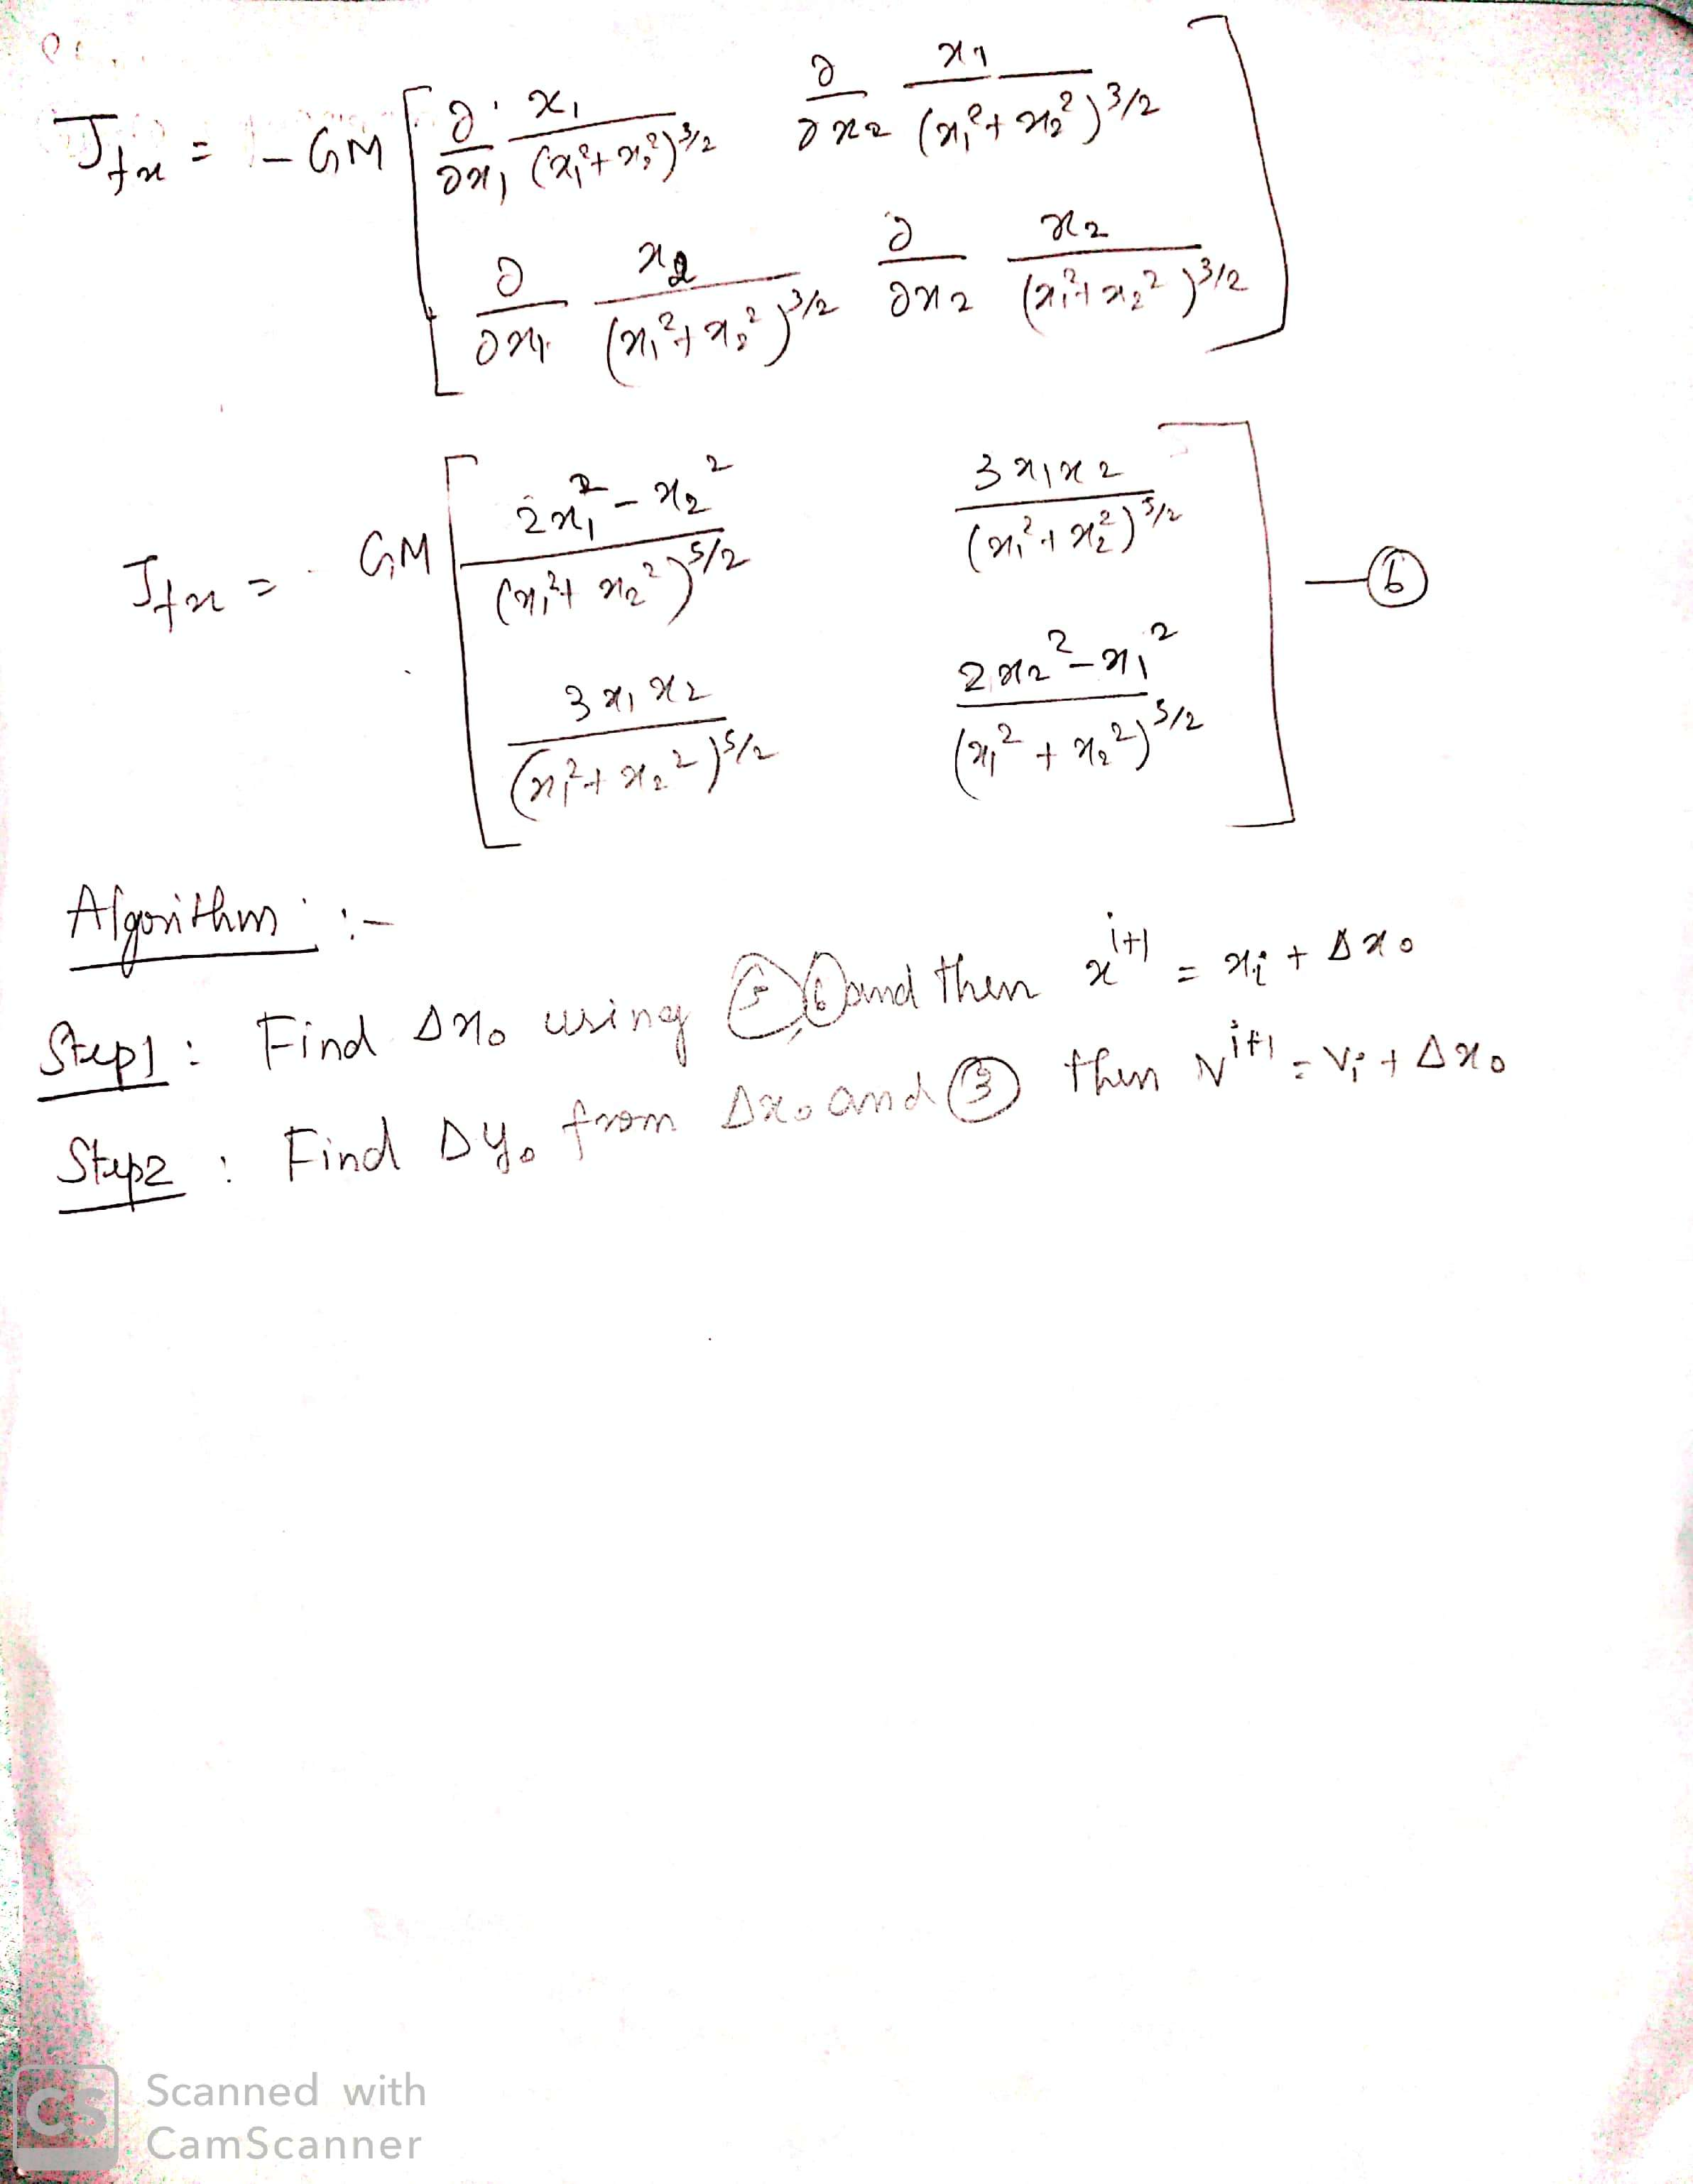

In [162]:
Image("./hw2_2.jpg")

In [6]:
def implicit(dt):
    gm = 4.*np.pi*np.pi
    def dist(x):
        return np.sqrt(x[0]**2+x[1]**2)

    def fx(t,x):
        return -gm*x/dist(x)**3

    a=1.
    e=0.02
    x0=np.array([0.,a*(1.-e)])
    v0=np.array([-np.sqrt((gm/a)*(1.+e)/(1.-e)),0.])
    t0=0.
    
    tmax=1.0
    nts=int(tmax/dt)
    xs_hist_imp=np.zeros([2,nts])
    ts_hist_imp=np.zeros([nts])
    t=t0
    x=x0
    v=v0
    eps=0.0001
    for i in range(nts):
        t=t+dt
        Jfx=gm/dist(x)**5*np.array([[2*x[0]**2-x[1]**2, 3*x[0]*x[1]],[3*x[0]*x[1],2*x[1]**2-x[0]**2]])
        delx=np.linalg.solve(np.identity(2)-dt**2*Jfx,dt*v+dt**2*fx(t,x))
        delv=1/dt*delx-v 
        x= x+delx
        v= v+delv
        xs_hist_imp[:,i]=x
        ts_hist_imp[i]=t
    return ts_hist_imp ,xs_hist_imp[0,:] ,xs_hist_imp[1,:], np.sqrt((xs_hist_imp[0,-1]-x0[0])**2.+(xs_hist_imp[1,-1]-x0[1])**2.)

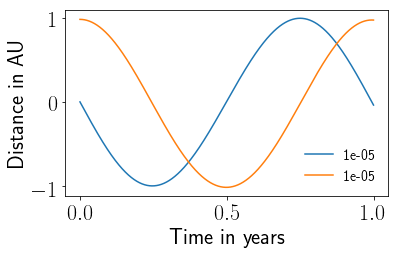

In [7]:
[ts,x,y,error]= implicit(0.0001)
plt.rc('text', usetex=True)
plt.rc('font', size=22)
plt.plot(ts,x,label=case)
plt.plot(ts,y,label=case)
plt.ylabel(r'Distance in AU')
plt.xlabel(r'Time in years')
plt.gcf().tight_layout()
plt.legend(fontsize=14, frameon=False)
plt.show()

In [9]:
delt= 10**np.linspace(-3.,-5.,15)

for idx, case in enumerate(delt):
    [ts,x,y,error]= implicit(case)
    print("Error caused in one time period for time step size %1.2e is %1.2e"%(case, error))

Error caused in one time period for time step size 1.00e-03 is 4.10e-01
Error caused in one time period for time step size 7.20e-04 is 2.88e-01
Error caused in one time period for time step size 5.18e-04 is 2.04e-01
Error caused in one time period for time step size 3.73e-04 is 1.46e-01
Error caused in one time period for time step size 2.68e-04 is 1.05e-01
Error caused in one time period for time step size 1.93e-04 is 7.51e-02
Error caused in one time period for time step size 1.39e-04 is 5.35e-02
Error caused in one time period for time step size 1.00e-04 is 3.90e-02
Error caused in one time period for time step size 7.20e-05 is 2.76e-02
Error caused in one time period for time step size 5.18e-05 is 1.98e-02
Error caused in one time period for time step size 3.73e-05 is 1.43e-02
Error caused in one time period for time step size 2.68e-05 is 1.03e-02
Error caused in one time period for time step size 1.93e-05 is 7.40e-03
Error caused in one time period for time step size 1.39e-05 is 5

### Since the error reduces as the time step tends to become zero, the scheme is convergent